In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re

In [2]:
#The latest date in the dataset is 2019-02-26. We will use this date as our current day.
today = '2019-02-26'

# Data Loading & Data Exploration

In [3]:
root_path = '/home/dqminhv/Springboard/Springboard_Capstone_Project_3/Data/data-science-for-good-careervillage/'

answers = pd.read_csv(root_path + 'answers.csv')
answer_scores = pd.read_csv(root_path + 'answer_scores.csv')
comments = pd.read_csv(root_path + 'comments.csv')
emails = pd.read_csv(root_path + 'emails.csv')
groups = pd.read_csv(root_path + 'groups.csv')
group_memberships = pd.read_csv(root_path + 'group_memberships.csv')
matches = pd.read_csv(root_path + 'matches.csv')
professionals = pd.read_csv(root_path + 'professionals.csv')
questions = pd.read_csv(root_path + 'questions.csv')
question_scores = pd.read_csv(root_path + 'question_scores.csv')
school_memberships = pd.read_csv(root_path + 'school_memberships.csv')
students = pd.read_csv(root_path + 'students.csv')
tags = pd.read_csv(root_path + 'tags.csv')
tag_questions = pd.read_csv(root_path + 'tag_questions.csv')
tag_users = pd.read_csv(root_path + 'tag_users.csv')

## comments

In [4]:
comments.head()

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40 UTC+0000,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47 UTC+0000,Most large universities offer study abroad pro...
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04 UTC+0000,"First, I want to put you at ease that the oppo..."
3,73a6223948714c5da6231937157e4cb7,d02f6d9faac24997a7003a59e5f34bd3,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 17:53:28 UTC+0000,Your question submission was great! I just wan...
4,55a89a9061d44dd19569c45f90a22779,e78f75c543e84e1c94da1801d8560f65,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 14:51:53 UTC+0000,Thank you. I'm new to this site. I'm sorry if ...


In [5]:
#Convert comments_date_added to a datetime object
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'])

## matches

In [7]:
matches.head()

,matches_email_id,matches_question_id
0,1721939,332a511f1569444485cf7a7a556a5e54
1,1665388,332a511f1569444485cf7a7a556a5e54
2,1636634,332a511f1569444485cf7a7a556a5e54
3,1635498,332a511f1569444485cf7a7a556a5e54
4,1620298,332a511f1569444485cf7a7a556a5e54


In [106]:
#Top 10 questions that are emailed to professionals
matches['matches_question_id'].value_counts()[:10]

matches_question_id
d9b06cd477a943b9b3821f37d64a1da3    2099
5a66b47f099f4e2ab069f42c7a4b076c    1854
502af307aca94f0fbd5318a46dda0c89    1781
25af07c8de984543b3d735891d7f3fd3    1765
0b1be66cd79e456ba75b5eec186b65a9    1756
4f3db830d5ed4e178534a87bb14925e8    1698
e01d3b0b12a741ad9c621f3ac831d3a2    1659
894d1e27a7aa42359b3dfbecc82eda1e    1649
b6f1419f0ac24d93bb83bf722bea6447    1647
c146e9855bbf45b68b8b976326714c89    1638
Name: count, dtype: int64

## tags

In [8]:
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


## tag_questions

In [10]:
tag_questions.head()

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


**Combine tag_questions with tags.**

In [11]:
tag_questions = tag_questions.merge(tags, left_on='tag_questions_tag_id', right_on='tags_tag_id', how='left')

In [12]:
tag_questions.drop('tags_tag_id', axis=1, inplace=True)

In [13]:
tag_questions.head()

,tag_questions_tag_id,tag_questions_question_id,tags_tag_name
0,28930,cb43ebee01364c68ac61d347a393ae39,minor
1,28930,47f55e85ce944242a5a347ab85a8ffb4,minor
2,28930,ccc30a033a0f4dfdb2eb987012f25792,minor
3,28930,e30b274e48d741f7bf50eb5e7171a3c0,minor
4,28930,3d22742052df4989b311b4195cbb0f1a,minor


## tag_users

In [14]:
tag_users.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


**Combine tag_users with tags.**

In [15]:
tag_users = tag_users.merge(tags, left_on='tag_users_tag_id', right_on='tags_tag_id', how='left').drop('tag_users_tag_id', axis=1)

In [16]:
tag_users.head()

,tag_users_user_id,tags_tag_id,tags_tag_name
0,c72ab38e073246e88da7e9a4ec7a4472,593,computer-software
1,8db519781ec24f2e8bdc67c2ac53f614,1642,programming
2,042d2184ee3e4e548fc3589baaa69caf,638,running
3,c660bd0dc1b34224be78a58aa5a84a63,11093,life-coach
4,8ce1dca4e94240239e4385ed22ef43ce,21539,art


## groups

In [17]:
groups.head()

,groups_id,groups_group_type
0,eabbdf4029734c848a9da20779637d03,youth program
1,7080bf8dcf78463bb03e6863887fd715,youth program
2,bc6fc50a2b444efc8ec47111b290ffb8,youth program
3,37f002e8d5e442ca8e36e972eaa55882,youth program
4,52419ff84d4b47bebd0b0a6c1263c296,youth program


In [107]:
#Number of different group
print('Types of groups: ')
print(groups['groups_group_type'].unique())

Types of groups: 
['youth program' 'cause' 'professional network' 'club' 'competition'
 'mentorship program' 'interest group']


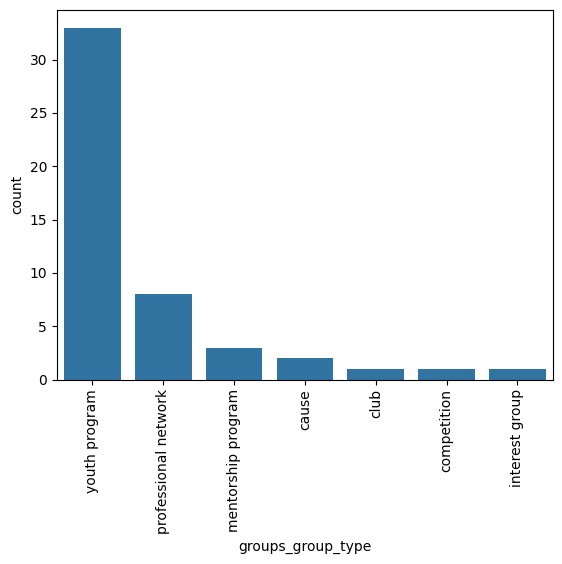

In [19]:
#Make a countplot for groups to see which groups are most popular
sns.countplot(x='groups_group_type', data=groups, order=groups['groups_group_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

## group_memberships

In [20]:
group_memberships.head()

,group_memberships_group_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab
4,eabbdf4029734c848a9da20779637d03,299da113c5d1420ab525106c242c9429


In [109]:
print('Number of users that belong to at least one group: ',
      group_memberships['group_memberships_user_id'].nunique())

Number of users that belong to at least one group:  727


## questions & question_scores

### Combining questions and question_scores dataframes

In [21]:
#Let look at the first few rows of questions
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [22]:
#Convert the 'questions_date_added' to datetime objects.
questions['questions_date_added'] = pd.to_datetime(questions['questions_date_added'])

In [23]:
#Check for missing values
questions.isnull().sum()

questions_id            0
questions_author_id     0
questions_date_added    0
questions_title         0
questions_body          0
dtype: int64

In [24]:
#Let look at the first few rows of question_scores
question_scores.head()

,id,score
0,38436aadef3d4b608ad089cf53ab0fe7,5
1,edb8c179c5d64c9cb812a59a32045f55,4
2,333464d7484b43e3866e86096bc4ddb9,6
3,4b995e60b99d4ee18346e893e007cb8f,6
4,f6b9ca94aed04ba28256492708e74f60,6


In [25]:
#Check for missing values
question_scores.isnull().sum()

id       0
score    0
dtype: int64

In [26]:
#Merge questions and question_scores
questions_question_scores = pd.merge(questions, question_scores,
                                     left_on='questions_id', 
                                     right_on='id', 
                                     how='left').drop('id', axis=1)

In [27]:
questions_question_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   questions_id          23931 non-null  object             
 1   questions_author_id   23931 non-null  object             
 2   questions_date_added  23931 non-null  datetime64[ns, UTC]
 3   questions_title       23931 non-null  object             
 4   questions_body        23931 non-null  object             
 5   score                 23928 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 1.1+ MB


### Number of users that post at least one questions

In [28]:
print('Number of users that post at least one question: ', questions_question_scores['questions_author_id'].nunique())

Number of users that post at least one question:  12329


In [29]:
print('Statistics of the number of questions a user asked: \n', 
     questions_question_scores.groupby('questions_author_id').size().describe())

Statistics of the number of questions a user asked: 
 count    12329.000000
mean         1.941033
std          2.724152
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         93.000000
dtype: float64


**On average, users who asked at least one question asked about 2 questions.**

### Number of questions posted on daily basic

In [30]:
question_by_date = pd.DataFrame(questions_question_scores.groupby(questions_question_scores['questions_date_added'].dt.date).size().reset_index(name='count'))

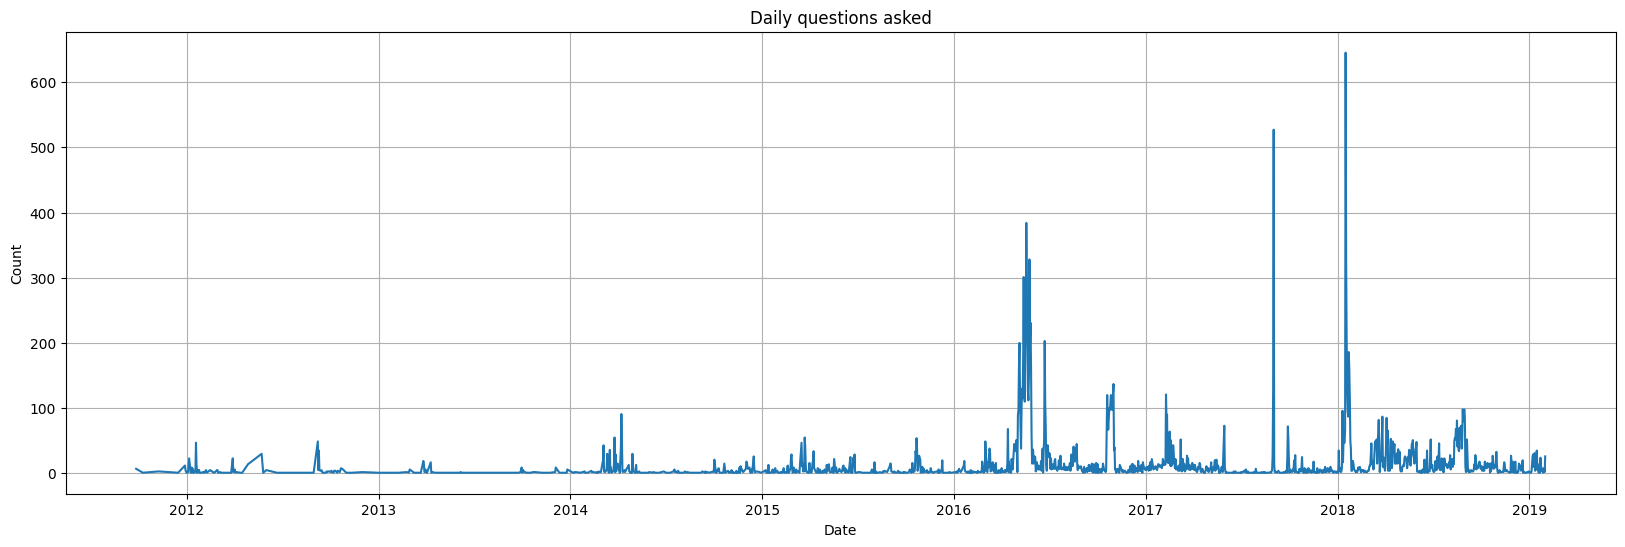

In [32]:
#Create time series plot for daily questions asked
plt.figure(figsize=(20, 6))
plt.plot(question_by_date.set_index('questions_date_added')['count'])
plt.title('Daily questions asked')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [33]:
#Let print out the statistics of the number of questions asked daily.
print('Stats of the number of questions asked daily.\n')
print(question_by_date.describe())

Stats of the number of questions asked daily.

             count
count  1581.000000
mean     15.136622
std      37.491809
min       1.000000
25%       2.000000
50%       4.000000
75%      13.000000
max     645.000000


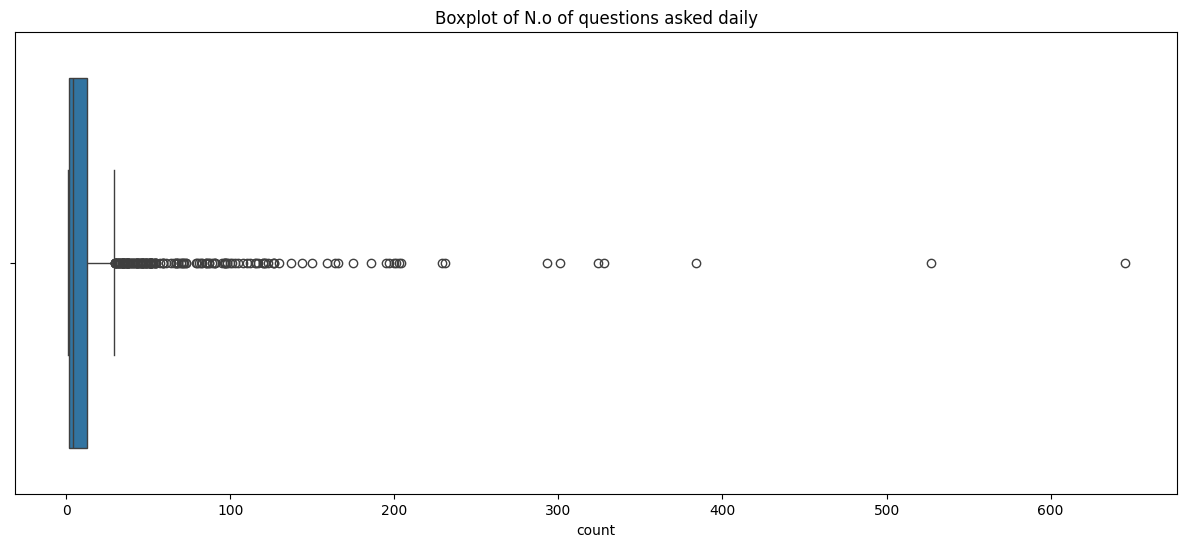

In [34]:
# Create boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x='count', data=question_by_date, legend=False)
plt.title('Boxplot of N.o of questions asked daily')
plt.show()

**Normally, there are less than 15 questions asked per day. However, there are some of the time that the number of questions asked jumps up quite significantly. One of the possible explaination could be that most career related questions will be asked during graduation month. We will create boxplots of daily questions asked for each month to see if this is the case.**

In [35]:
#Group the dataframe by month.
question_by_date['month'] = pd.to_datetime(question_by_date['questions_date_added']).dt.month

In [36]:
#Calculate the average number of questions asked daily for each month
question_by_month = question_by_date.groupby('month').agg({'count':'mean'}).reset_index()

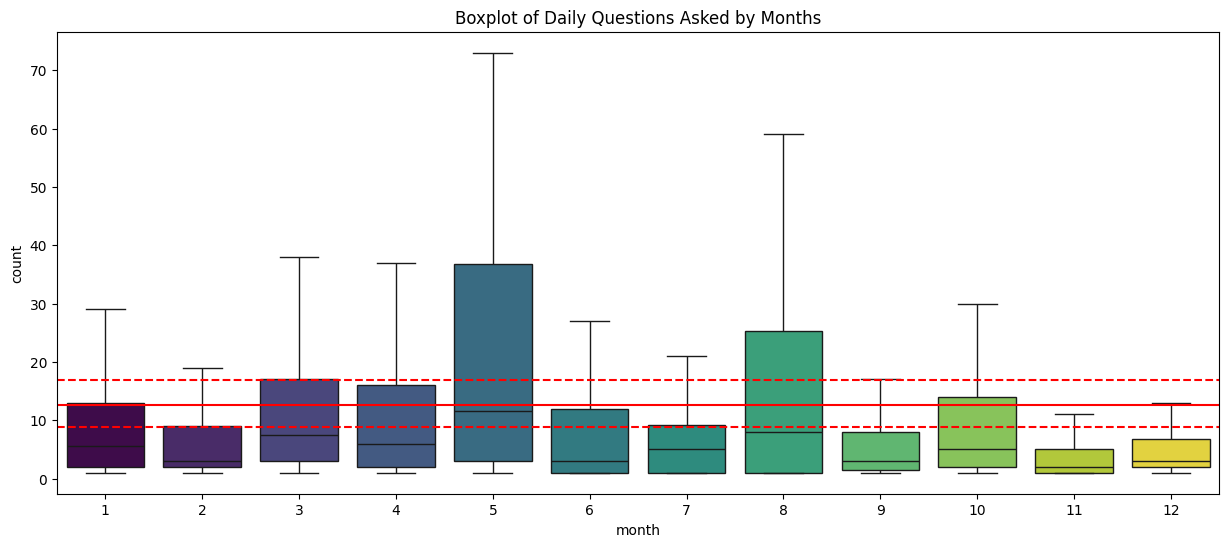

In [37]:
# Create boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x='month', y='count', data=question_by_date, hue='month', palette='viridis', legend=False, showfliers=False)
plt.axhline(y = question_by_month['count'].quantile(q=.25), color = 'r', linestyle = '--')
plt.axhline(y = question_by_month['count'].quantile(q=.50), color = 'r', linestyle = '-')
plt.axhline(y = question_by_month['count'].quantile(q=.75), color = 'r', linestyle = '--')
plt.title('Boxplot of Daily Questions Asked by Months')
plt.show()

**From the above plot, it seems that most questions were asked in May, which is reasonable since May is the graduation month. January and August also have higher number of daily questions asked compare to other months.**

**Let make a cummulative sum of the number of questions asked daily.**

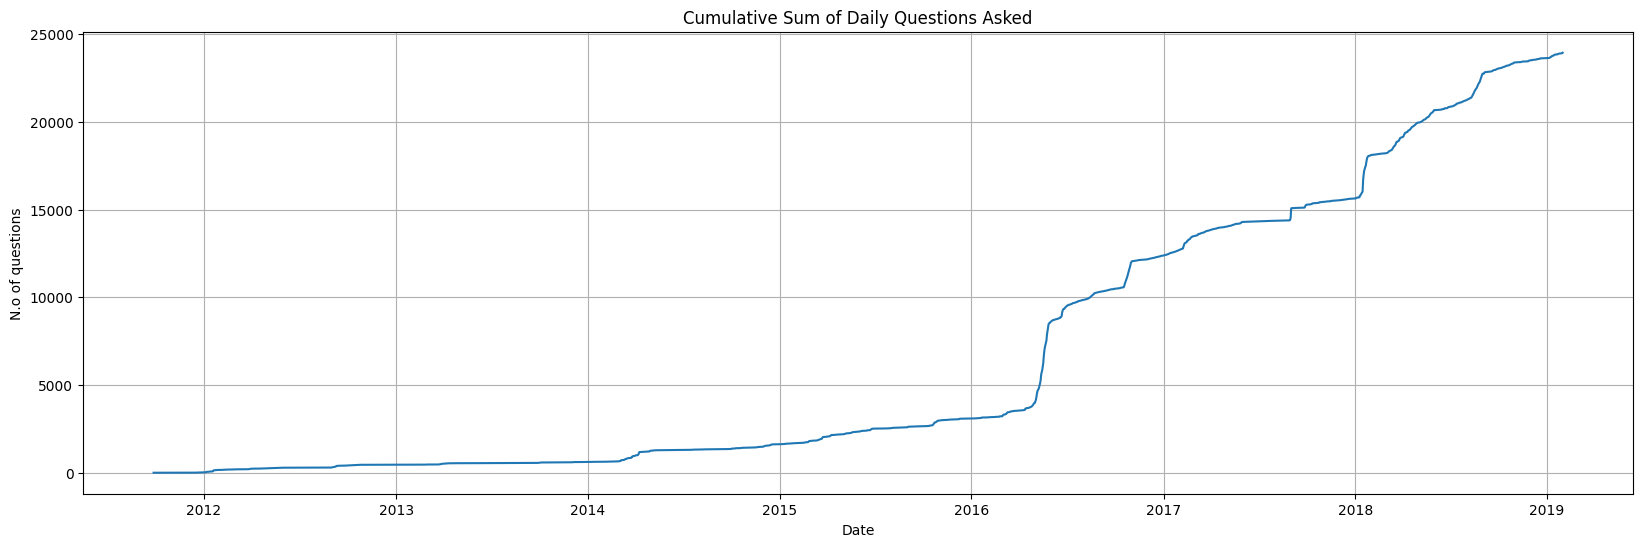

In [38]:
# Plotting
plt.figure(figsize=(20, 6))
plt.plot(question_by_date.set_index('questions_date_added')['count'].cumsum())
plt.title('Cumulative Sum of Daily Questions Asked')
plt.xlabel('Date')
plt.ylabel('N.o of questions')
plt.grid(True)
plt.show()

**There was a significant increase in the number of questions asked daily since the first half of 2016. We will see later if this was cause by the increase in the number of users.**

### Number of questions posted on monthly basic

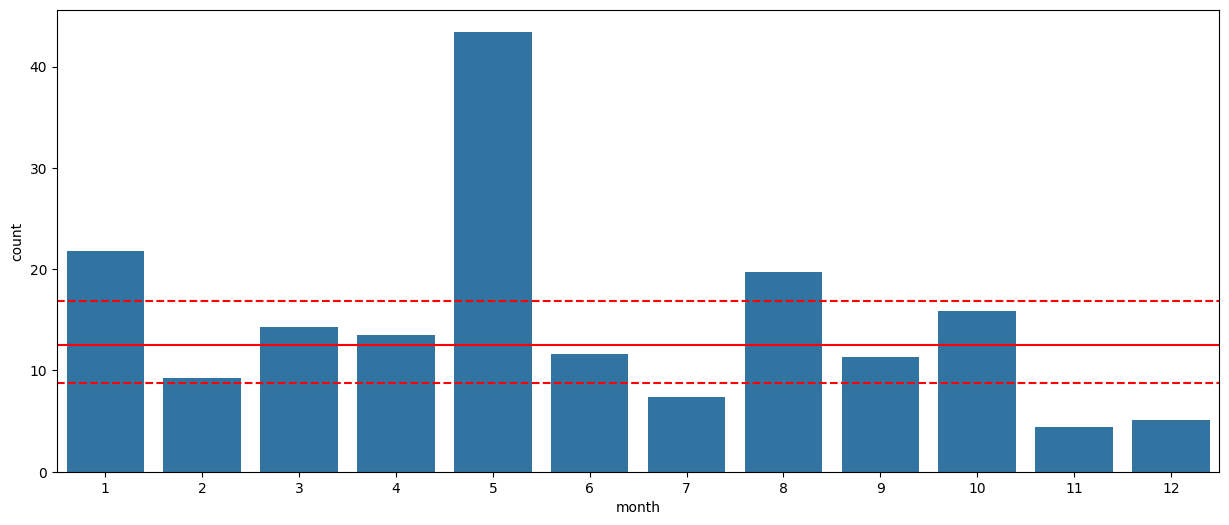

In [39]:
#Create a barplot for the number of questions asked by month
plt.figure(figsize=(15, 6))
plt.axhline(y = question_by_month['count'].quantile(q=.25), color = 'r', linestyle = '--')
plt.axhline(y = question_by_month['count'].quantile(q=.50), color = 'r', linestyle = '-')
plt.axhline(y = question_by_month['count'].quantile(q=.75), color = 'r', linestyle = '--')

sns.barplot(y=question_by_month['count'], x=question_by_month['month'])
plt.show()

### Statistics of questions scores

In [40]:
print('Question scores stats:\n', questions_question_scores['score'].describe())

Question scores stats:
 count    23928.000000
mean         2.900326
std          4.745618
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        125.000000
Name: score, dtype: float64


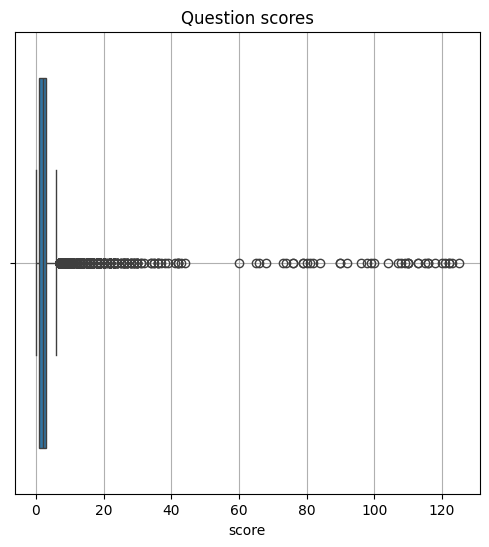

In [41]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=questions_question_scores, x='score')
plt.title('Question scores')
plt.grid(True)
plt.show()

### Questions topics

**For questions topics, let first combine the tag_questions with questions.**

In [42]:
questions_with_tags = questions.merge(tag_questions,
                                      left_on='questions_id',
                                      right_on='tag_questions_question_id', 
                                      how='left')

In [45]:
#Create a function to clean the text feature
stop=set(stopwords.words("english"))

def clean(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'[^\s]+@.*?\s+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove underscores
    text = re.sub(r'_', '', text)

    # Remove single characters
    text = re.sub(r'\s+', ' ', text)

    # Remove multiple spaces
    text = text.strip()

    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]

    return " ".join(text)

In [46]:
#Combine the questions_title and questions_body into a single column question_content
questions_question_scores['question_content'] = ""
questions_question_scores['question_content'] = questions_question_scores['questions_title'] + " " +\
                                                questions_question_scores['questions_body']

In [47]:
#Clean the text column
questions_question_scores['question_content'] = questions_question_scores['question_content'].apply(clean)

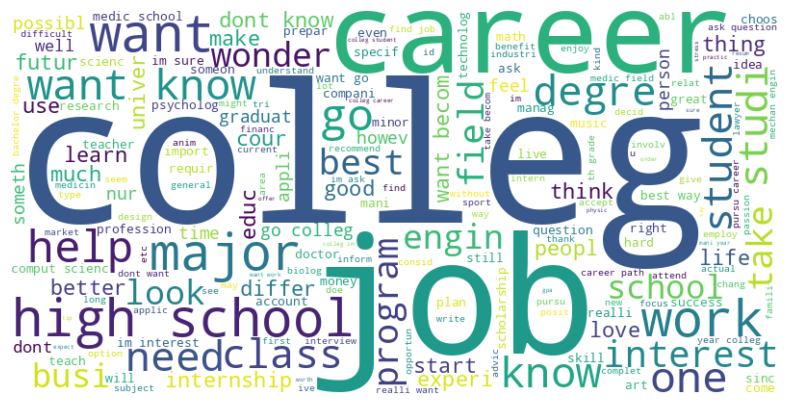

In [48]:
#Create a wordcloud for questions
from wordcloud import WordCloud

text_data = questions_question_scores['question_content'].str.cat(sep=' ')

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [49]:
# Print the most frequent words
frequent_words = wordcloud.words_
print("Most frequent words:")
for word, frequency in frequent_words.items():
    print(f"{word}: {frequency}")

Most frequent words:
colleg: 1.0
job: 0.6863317757009346
career: 0.6423286604361371
high school: 0.5751557632398754
want: 0.5665887850467289
work: 0.5379672897196262
major: 0.5325155763239875
go: 0.40829439252336447
help: 0.39116043613707163
one: 0.37227414330218067
know: 0.3623442367601246
want know: 0.3613707165109034
studi: 0.34034267912772587
need: 0.3374221183800623
degre: 0.33391744548286606
class: 0.3115264797507788
student: 0.30490654205607476
interest: 0.29439252336448596
program: 0.28640965732087226
take: 0.28329439252336447
best: 0.282904984423676
field: 0.28095794392523366
wonder: 0.25934579439252337
look: 0.2558411214953271
engin: 0.2548676012461059
school: 0.24026479750778817
busi: 0.2371495327102804
internship: 0.2324766355140187
think: 0.23228193146417445
good: 0.23111370716510904
make: 0.2287772585669782
futur: 0.22059968847352024
experi: 0.21806853582554517
much: 0.21144859813084113
thing: 0.2102803738317757
life: 0.2044392523364486
peopl: 0.20424454828660435
better: 

**We will explore the topics of the questions. For exploratory purpose, we will use sklearn LDA for simplicity and faster run time, comparing to gensim.**

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


documents = questions_question_scores['question_content']

# Convert text to a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
#vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit an LDA model
num_topics = 10  # You can adjust the number of topics based on your data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topic_words = {}

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words[f"Topic {topic_idx + 1}"] = top_words

# Create a DataFrame to display the top words for each topic
topic_df = pd.DataFrame(topic_words)
print(topic_df)


     Topic 1 Topic 2    Topic 3    Topic 4 Topic 5    Topic 6 Topic 7  \
0     biolog  design      major     comput   engin        job  colleg   
1       want     art      degre     scienc  career       busi  school   
2   research   music     colleg    account    like     career    nurs   
3      major    want    teacher     career  mechan       want    want   
4  chemistri    game     career    program   field       work    high   
5     scienc      im       want  technolog    want      manag      im   
6     career  career         im       want    know     market   medic   
7      becom  colleg  psycholog      major   sport      start    year   
8       like  school      teach       know     job       know  doctor   
9      marin    love        law         im      im  interview  career   

       Topic 8  Topic 9 Topic 10  
0       colleg    becom    becom  
1  scholarship     want     want  
2        money    studi    write  
3         work    engin   physic  
4         want       

## answers & answer_scores

In [51]:
#Let look at a few rows of answers
answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


In [52]:
#Convert 'answers_date_added' to Datetime object
answers['answers_date_added'] = pd.to_datetime(answers['answers_date_added'])

In [53]:
#Check for missing values
answers.isnull().sum()

answers_id             0
answers_author_id      0
answers_question_id    0
answers_date_added     0
answers_body           1
dtype: int64

In [54]:
#There is one answer that does not have content. Let look at that answer and we will address it later.
answers[answers['answers_body'].isnull()]

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
48625,1c6190c8090248a3b639407dcd5819e5,f123a7e8ad2345b49378d51b2238c50b,6583e411a80149ae90b0cd08fe0c200f,2016-05-19 05:31:28+00:00,NaN


In [55]:
#Let look at a few rows of the answer_scores
answer_scores.head()

,id,score
0,7b2bb0fc0d384e298cffa6afde9cf6ab,1
1,7640a6e5d5224c8681cc58de860858f4,5
2,3ce32e236fa9435183b2180fb213375c,2
3,fa30fe4c016043e382c441a7ef743bfb,0
4,71229eb293314c8a9e545057ecc32c93,2


In [56]:
#Let check for missing value
answer_scores.isnull().sum()

id       0
score    0
dtype: int64

In [57]:
#Merge the answers and answer_scores by the answers_id
answers_answer_scores = pd.merge(answers, answer_scores,
                                     left_on='answers_id', 
                                     right_on='id', 
                                     how='left').drop('id', axis=1)

### Merging questions and answers

In [58]:
questions_answers = pd.merge(questions_question_scores, answers_answer_scores,
                                     left_on='questions_id', 
                                     right_on='answers_question_id', 
                                     how='right').drop('answers_question_id', axis=1)

In [59]:
questions_answers.rename(columns={'score_x': 'questions_score', 'score_y': 'answers_score'}, inplace=True)

### How many answers a question get?

In [60]:
#Let count the number of answers a question receives
questions_answers_1 = questions_answers.groupby('questions_id').agg({'answers_id':'count'}).rename({'answers_id':'num_answer'})

In [61]:
#Statistics of the number of answers per question.
questions_answers_1.describe()

,answers_id
count,23110.000000
mean,2.212159
std,1.790353
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,58.000000


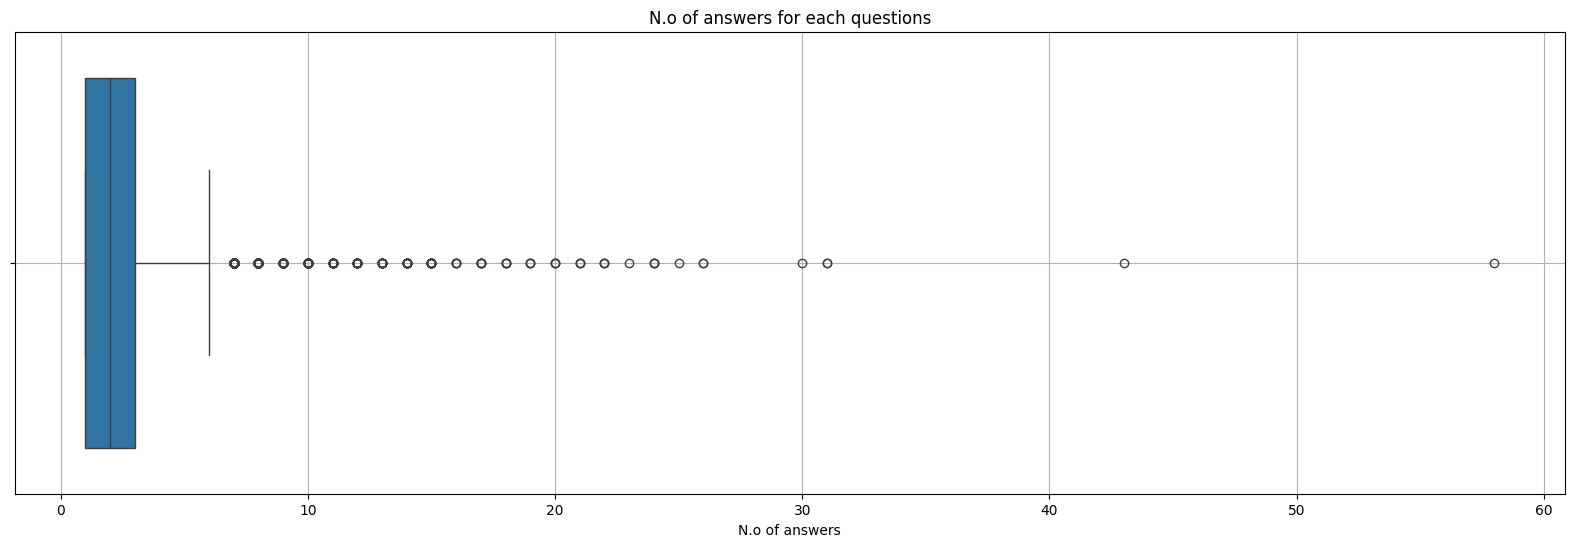

In [62]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=questions_answers_1, x='answers_id')
plt.xlabel('N.o of answers')
plt.title('N.o of answers for each questions')
plt.grid(True)
plt.show()

**All questions get at least one answered, and most questions get around under 5 answers.**

### How long does it take for a question to get at least one answer after it was posted?

In [63]:
#Create a "questions_get_answers" column that count how many days between a question and an answer
questions_answers['questions_get_answers'] = questions_answers['answers_date_added'] - questions_answers['questions_date_added']

In [64]:
#Convert the timedelta object to integer.
questions_answers['questions_get_answers'] = questions_answers['questions_get_answers'].dt.days

In [65]:
questions_answers_2 = questions_answers.groupby('questions_id').\
                                                                agg({'questions_date_added':'first', 
                                                                     'answers_date_added':'first',
                                                                     'questions_get_answers':'min'})

In [66]:
#Statistics of the number of days a question gets its first answer.
questions_answers_2['questions_get_answers'].describe()

count    23110.000000
mean        65.495759
std        137.801206
min         -1.000000
25%          0.000000
50%          2.000000
75%         53.000000
max       1897.000000
Name: questions_get_answers, dtype: float64

**There are some -1 values. It might be caused due to differences in time zone between where the question is asked and where the answer comes from when a question gets the answer in the same day. We will address this problem by making all -1 value as 0.**

In [67]:
questions_answers_2.loc[questions_answers_2['questions_get_answers'] < 0, 'questions_get_answers'] = 0

In [68]:
#Statistics of the number of days a question gets its first answers after transforming negative values.
questions_answers_2.describe()

,questions_get_answers
count,23110.000000
mean,65.496452
std,137.800874
min,0.000000
25%,0.000000
50%,2.000000
75%,53.000000
max,1897.000000


**On average, a question is first answered within 65 days. About 25% number of questions are answered within 24 hours after posted. Half of the questions are answered within 2 days.**

**We can make a boxplot to see the distribution of answer time.**

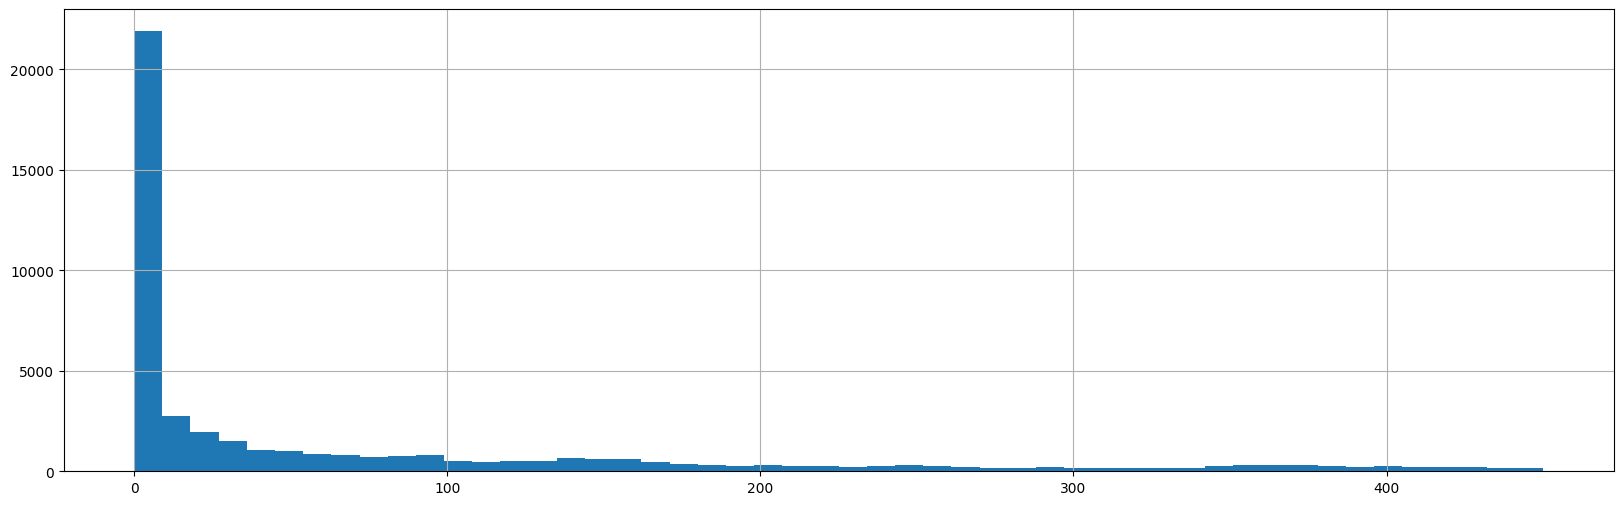

In [69]:
#Histogram
plt.figure(figsize=(20, 6))
plt.hist(data=questions_answers, x='questions_get_answers', range=(0,450), bins=50)
plt.grid(True)
plt.show()

**Let see how the response time changes over the years.**

In [70]:
x = questions_answers_2.groupby(questions_answers_2['questions_date_added'].dt.year).agg({'questions_get_answers':'mean'}).index
y = questions_answers_2.groupby(questions_answers_2['questions_date_added'].dt.year).agg({'questions_get_answers':'mean'})['questions_get_answers'].values

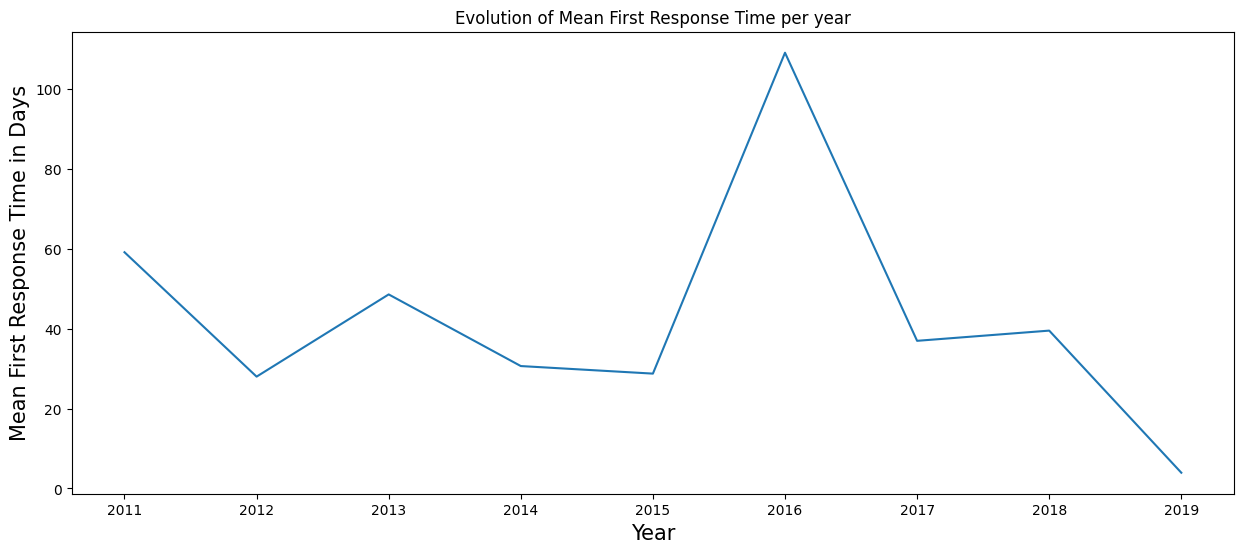

In [71]:
plt.figure(figsize=(15,6))
plt.plot(x,y)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean First Response Time in Days', fontsize=15)
plt.title('Evolution of Mean First Response Time per year')
plt.show()

### How a question is addressed?

In [72]:
print('N.o of answers that have 0 score: ', answer_scores[answer_scores['score'] == 0]['score'].shape[0])
print('N.o of answer that have > 0 score: ', answer_scores[answer_scores['score'] > 0]['score'].count())

N.o of answers that have 0 score:  37301
N.o of answer that have > 0 score:  13837


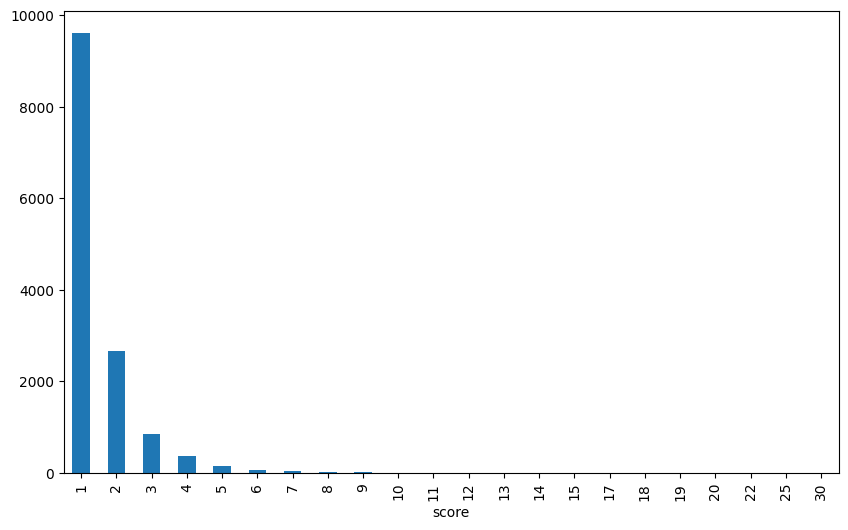

In [73]:
#Countplot of the scores of the rated answers
plt.figure(figsize=(10,6))
answer_scores[answer_scores['score'] > 0]['score'].value_counts().sort_index().plot.bar()
plt.show()

In [74]:
print('score / count')
answer_scores[answer_scores['score'] > 0]['score'].value_counts().sort_index()

score / count


score
1     9615
2     2660
3      854
4      362
5      159
6       67
7       45
8       28
9       13
10       8
11       5
12       7
13       3
14       3
15       1
17       1
18       1
19       1
20       1
22       1
25       1
30       1
Name: count, dtype: int64

**Most of the answers are not rated, about 73% of the total number of answers. Most of the answers that are rated receive score 1 and 2.**

In [75]:
print('Number of questions that have rated answers: ',
      (questions_answers.groupby('questions_id').agg({'answers_score':'sum'})['answers_score'] > 0).sum())

print('Number of questions that have no rated answers: ',
      (questions_answers.groupby('questions_id').agg({'answers_score':'sum'})['answers_score'] == 0).sum())

Number of questions that have rated answers:  8187
Number of questions that have no rated answers:  14923


**We can see that the number of questions that received rated answers are much fewer than those that received non-rated answers. This will be a problem we need to address when building the recommendation model since we do not full know whether an answer satisfies the question in many cases.**

## professionals

In [76]:
professionals.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [77]:
professionals['professionals_date_joined'] = pd.to_datetime(professionals['professionals_date_joined'])

### Professionals locations

**There are so many unique values of professionals_location, we create a wordcloud to get an insight about the most common locations of professionals.**

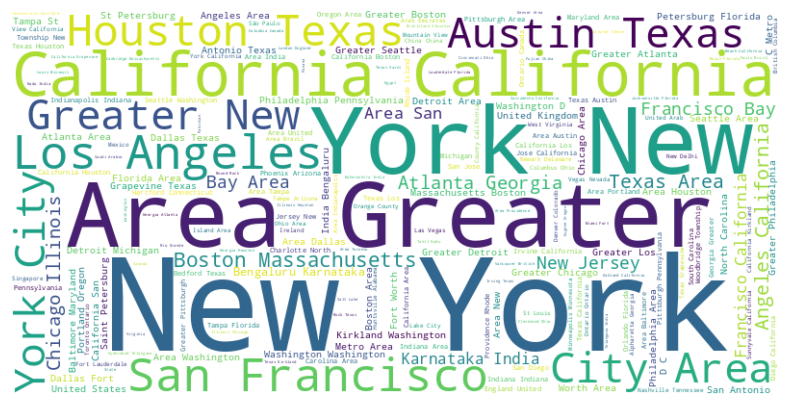

In [78]:
location_data = professionals['professionals_location'].str.cat(sep=' ')

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(location_data)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**From the wordcloud, we can assume some of the most common locations:**
* Newyork City, NY
* Los Angeles, CA
* San Francisco, CA
* Austin, TX
* Boston, MA
* Chicago, IL
* Atlanta, GA

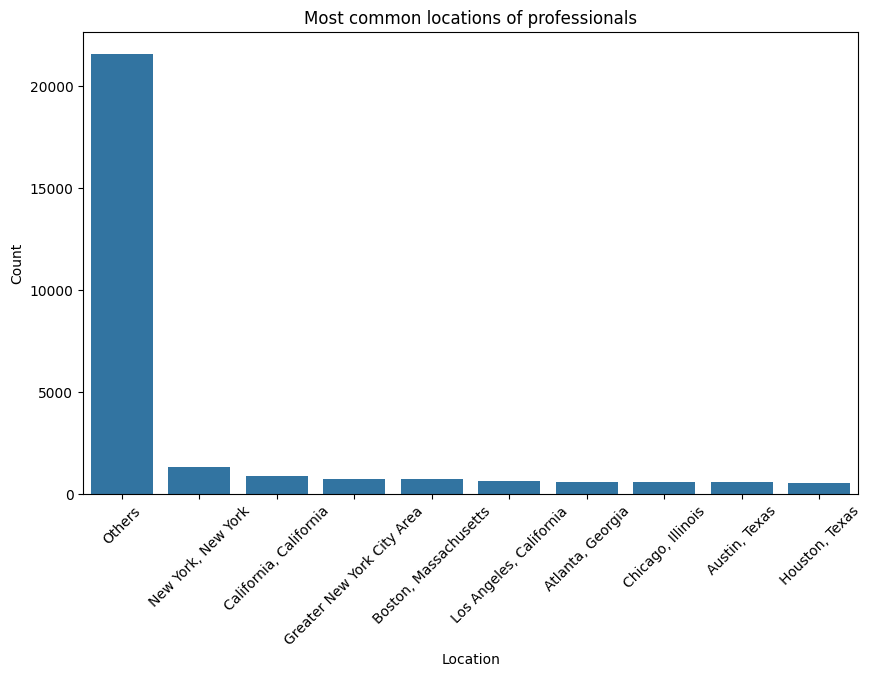

In [79]:
#We make a countplot to confirm our findings.
professionals_top_location = professionals['professionals_location'].value_counts().index[:9]

# Replace values not in the top 9 with 'Others'
professionals['professionals_location'] = np.where(professionals['professionals_location'].isin(professionals_top_location), professionals['professionals_location'], 'Others')

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=professionals, x='professionals_location', order=professionals['professionals_location'].value_counts().index)
plt.title('Most common locations of professionals')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

### Professionals Industries

**We will use the same procedures to explore the professionals industry.**

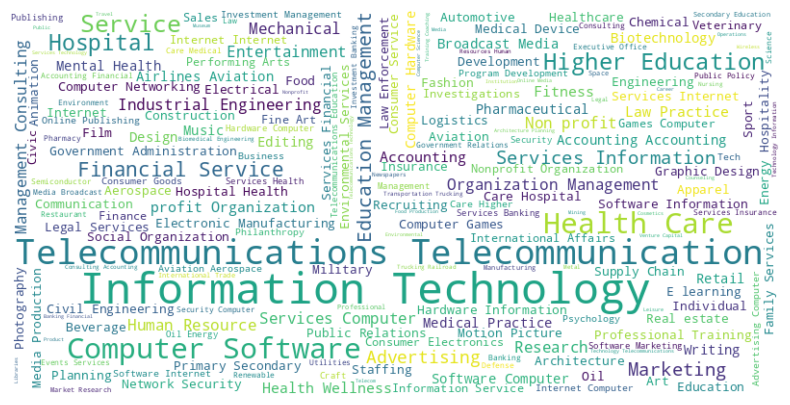

In [80]:
industry_data = professionals['professionals_industry'].str.cat(sep=' ')

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(industry_data)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

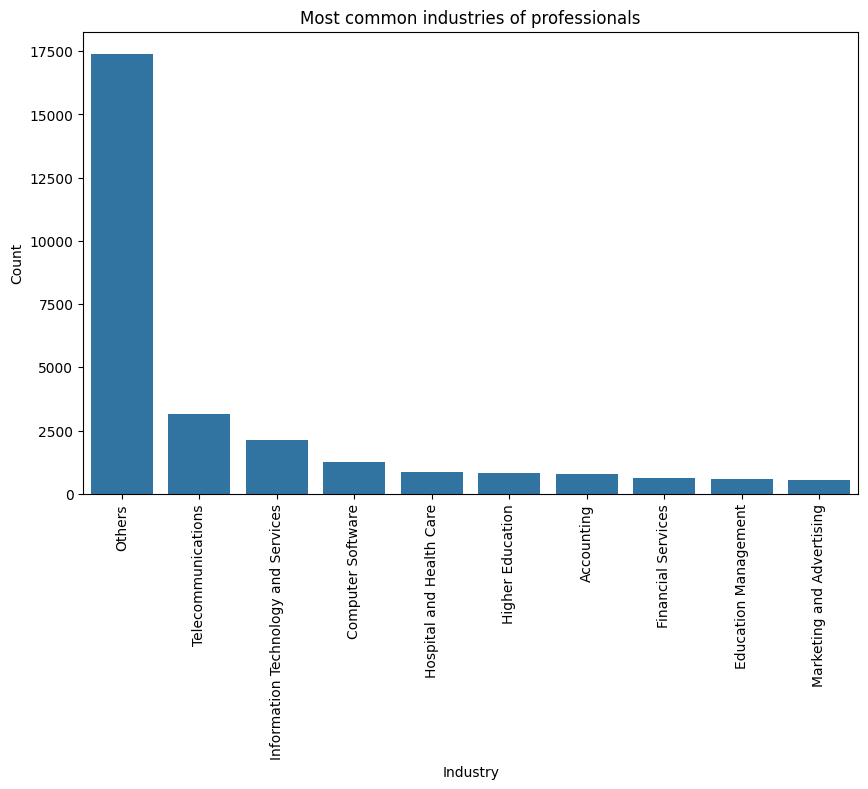

In [81]:
#We make a countplot to confirm our findings.
professionals_top_industry = professionals['professionals_industry'].value_counts().index[:9]

# Replace values not in the top 9 with 'Others'
professionals['professionals_industry'] = np.where(professionals['professionals_industry'].isin(professionals_top_industry), professionals['professionals_industry'], 'Others')

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=professionals, x='professionals_industry', order=professionals['professionals_industry'].value_counts().index)
plt.title('Most common industries of professionals')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

### Number of professionals joining in over time

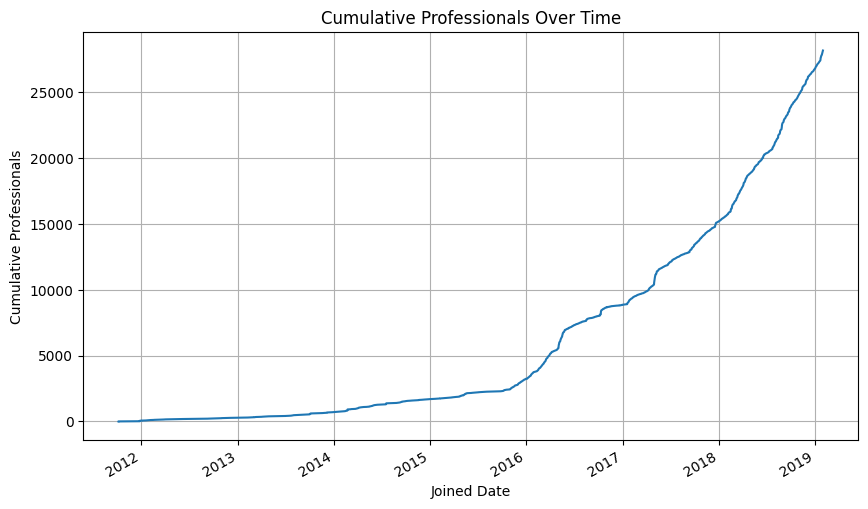

In [82]:
#Create a dataframe professionals_2 sorted by the professionals_date_joined
professionals_2 = professionals.sort_values('professionals_date_joined')

#Create a cumsum column
professionals_2['cumulative_professionals'] = 1

# Plotting
plt.figure(figsize=(10, 6))

professionals_2.set_index('professionals_date_joined')['cumulative_professionals'].cumsum().plot(kind='line', figsize=(10, 6))

plt.title('Cumulative Professionals Over Time')
plt.xlabel('Joined Date')
plt.ylabel('Cumulative Professionals')
plt.grid(True)
plt.show()

**From the cumsum chart, we see that the number of professionals joined in the platform increases significantly around the start of 2016.**

### Number of answers per professional

In [83]:
print('Number of professionals that provide at least one answer: ', 
      answers.groupby('answers_author_id').agg({'answers_id':'count'}).\
      rename(columns={'answers_id':'count'}).shape[0])

Number of professionals that provide at least one answer:  10169


In [84]:
#Top 10 professionals by the number of answers
answers.groupby('answers_author_id').agg({'answers_id':'count'}).\
                                    rename(columns={'answers_id':'count'}).\
                                    sort_values('count', ascending=False)[:10]

,count
answers_author_id,
36ff3b3666df400f956f8335cf53e09e,1710
58fa5e95fe9e480a9349bbb1d7faaddb,1112
a1006e6a58a0447592e2435caa230f78,915
be5d23056fcb4f1287c823beec5291e1,711
05ab77d4c6a141b999044ebbf5415b0d,616
369f1c8646b649f6997eae7809696bd5,406
a6d33c38902546849c36ea7e9e9f0870,259
05444a2f42454327b2ac4b463c0adbe0,257
4dc61581ec7b409bbd037e483f53ba0a,217


/tmp/ipykernel_2651/4148218597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(answers.groupby('answers_author_id').\


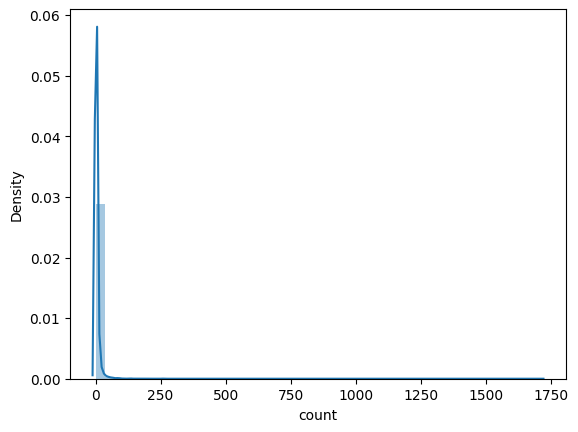

In [85]:
sns.distplot(answers.groupby('answers_author_id').\
             agg({'answers_id':'count'}).\
             rename(columns={'answers_id':'count'})\
             [answers.groupby('answers_author_id').agg({'answers_id':'count'}).\
             rename(columns={'answers_id':'count'})['count']>0]['count'])
plt.show()

In [86]:
answers_sum = answers.groupby('answers_author_id', as_index=False).\
                        agg({'answers_id':'count'}).\
                        rename(columns={'answers_id':'n.o_of_answers'})

In [87]:
comments_sum = comments.groupby('comments_author_id', as_index=False).\
                        agg({'comments_id':'count'}).\
                        rename(columns={'comments_id':'n.o_of_comments'})

In [88]:
#Merge professionals with answers and comments
professionals_answers_comments = pd.merge(pd.merge(professionals, answers_sum,
                                                    left_on = 'professionals_id',
                                                    right_on = 'answers_author_id',
                                                    how = 'left').drop('answers_author_id', axis=1), comments_sum,
                                          left_on = 'professionals_id',
                                          right_on = 'comments_author_id',
                                          how = 'left').drop('comments_author_id', axis=1)
                                          

In [89]:
print('Total number of professionals: ', professionals.shape[0])
print('Number of professionals that have never provided an answer or comment: ',
      professionals_answers_comments[(professionals_answers_comments['n.o_of_answers'].isnull()) &
                                     (professionals_answers_comments['n.o_of_comments'].isnull())].shape[0])

Total number of professionals:  28152
Number of professionals that have never provided an answer or comment:  17866


### emails

In [90]:
emails.head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily
4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40 UTC+0000,email_notification_daily


In [91]:
emails['emails_date_sent'] = pd.to_datetime(emails['emails_date_sent'])

**Top 10 professionals that receive the most email.**

In [92]:
emails['emails_recipient_id'].value_counts()[:10]

emails_recipient_id
0079e89bf1544926b98310e81315b9f1    3496
36ff3b3666df400f956f8335cf53e09e    3348
a082cb6441ce48f6bf9abe0f8e55d5fe    2970
82d744719ffd452a8b1bd62cd17e5056    2637
a41eeb74c7ad4310be0a166d3dac3d12    2587
ccad06e8fb2749c8bccee97b2538ea50    2252
5688bc6b68b243a7bb3144f0fcc02a30    2133
547122349484428c885dd9d18051b71e    2016
73cbd4b0241f4e9dbd5e8b5b48c7e701    1958
99c1e11f1161446f9199feab65b4b795    1942
Name: count, dtype: int64

**Professionals that receive no email.**

In [93]:
professionals_emails = pd.merge(professionals, 
                                emails.groupby('emails_recipient_id', as_index=False).agg({'emails_id':'count'}).rename(columns={'emails_id':'emails_count'}),
                                left_on = 'professionals_id',
                                right_on = 'emails_recipient_id',
                                how = 'left').drop('emails_recipient_id', axis=1)

In [94]:
print('Number of professionals that receive no email: ',
professionals_emails[professionals_emails['emails_count'].isnull()].shape[0])

Number of professionals that receive no email:  5984


## students

In [95]:
students.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00 UTC+0000
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00 UTC+0000


In [96]:
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'])

In [97]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   students_id           30971 non-null  object             
 1   students_location     28938 non-null  object             
 2   students_date_joined  30971 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 726.0+ KB


### Students locations

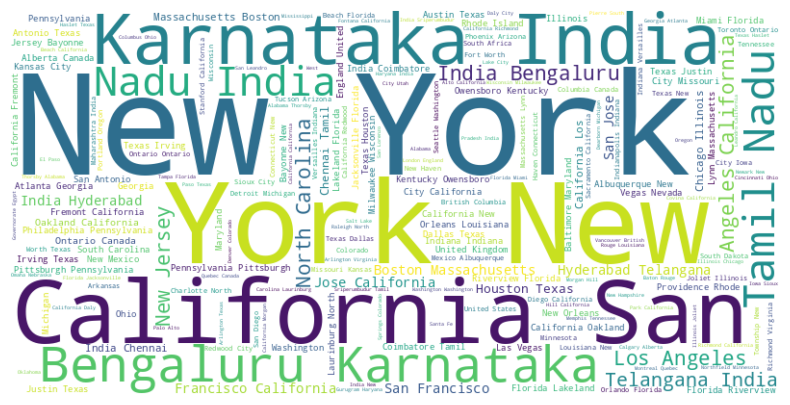

In [98]:
student_location_data = students['students_location'].str.cat(sep=' ')

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(student_location_data)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**From the word cloud, we can make a guess that most students are from New York, California or from India.**
** **

**Let make a countplot to see which locations that most students located.**

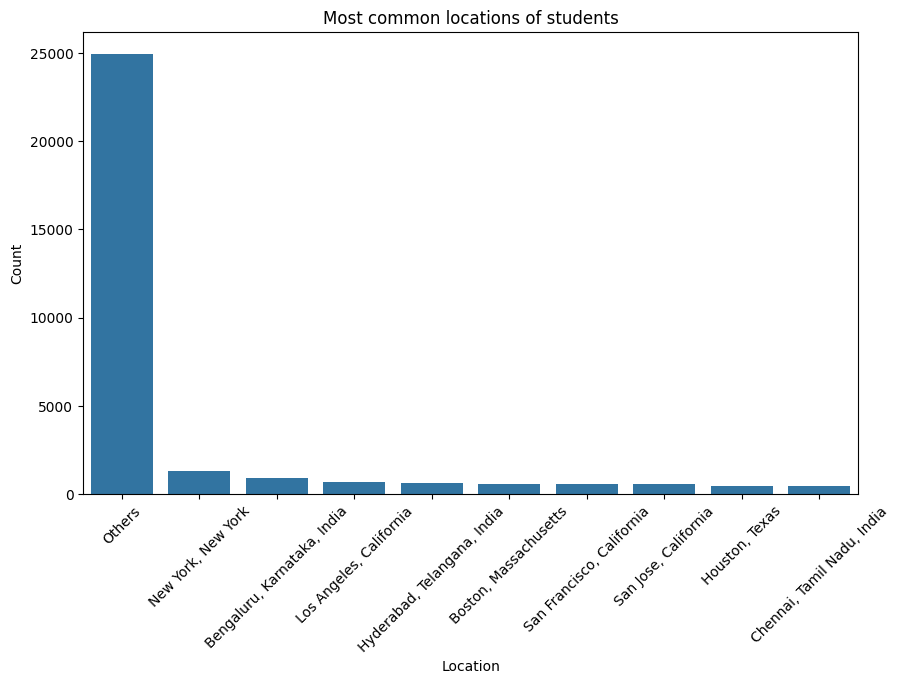

In [99]:
#We make a countplot to confirm our findings.
students_top_location = students['students_location'].value_counts().index[:9]

# Replace values not in the top 9 with 'Others'
students['students_location'] = np.where(students['students_location'].isin(students_top_location), students['students_location'], 'Others')

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=students, x='students_location', order=students['students_location'].value_counts().index)
plt.title('Most common locations of students')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

### school_memberships

In [100]:
school_memberships.head()

,school_memberships_school_id,school_memberships_user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116
4,182063,9c5803ae43ca4cf6b27ea85871625116


In [101]:
students_questions = pd.merge(students, 
                              questions.groupby('questions_author_id', as_index=False).agg({'questions_id':'count'}).rename(columns={'questions_id':'n.o_of_questions'}),
                             left_on = 'students_id',
                             right_on = 'questions_author_id',
                             how = 'left').drop('questions_author_id', axis=1)


In [102]:
print('Number of students that have not asked a question: ',
students_questions['n.o_of_questions'].isnull().sum())

Number of students that have not asked a question:  18667


In [103]:
students_school_memberships = pd.merge(students, 
                                       school_memberships,
                                         left_on = 'students_id',
                                         right_on = 'school_memberships_user_id',
                                         how = 'left').drop('school_memberships_user_id', axis=1)


In [104]:
print('Number of student users: ', students.shape[0])
print('Number of students that do not have school membership: ',
students_school_memberships[students_school_memberships['school_memberships_school_id'].isnull()].shape[0])

Number of student users:  30971
Number of students that do not have school membership:  29911
